In [ ]:
#!pip install mediapipe opencv-python

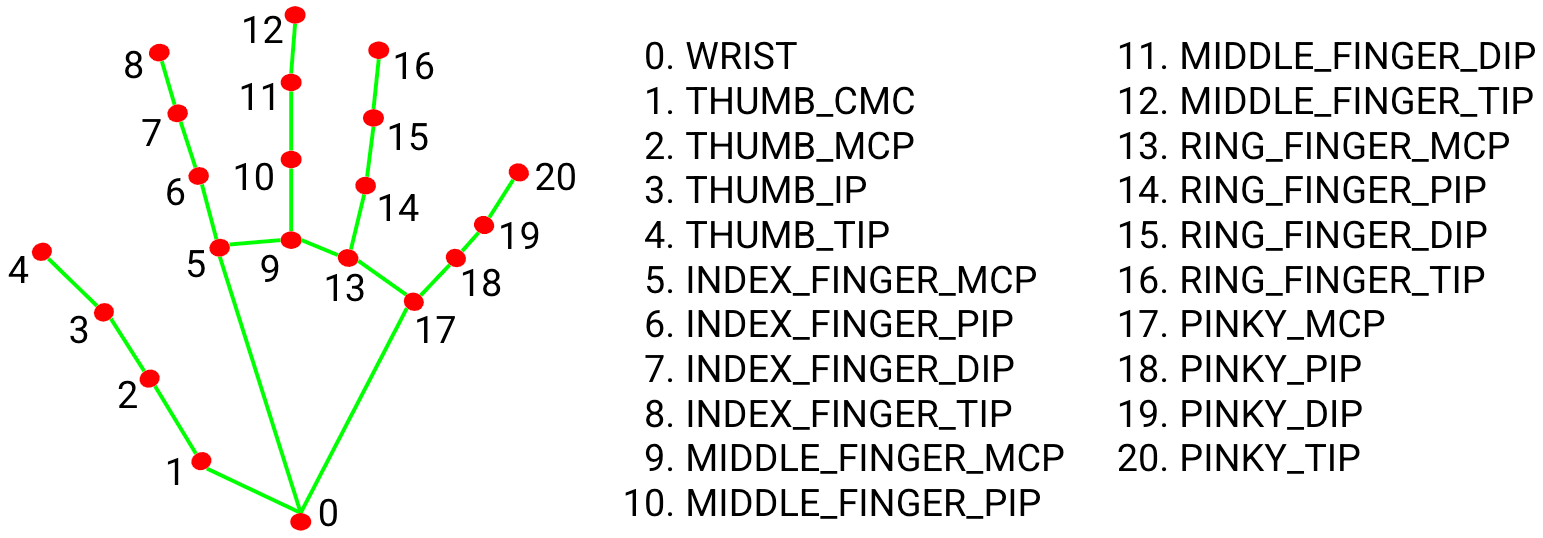

In [ ]:
import mediapipe as mp
import numpy as np
import cv2
import math

#Hand keypoint 그리기 위한
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands    

#웹캠 열기
cap = cv2.VideoCapture(0)

#Hand Pose Estimation Model 기본 설정(공식문서 참고)
with mp_hands.Hands(max_num_hands=2, min_detection_confidence=0.5, min_tracking_confidence=0.5) as hands: 
    
    while cap.isOpened(): #웹캠이 열려있으면
        ret, frame = cap.read() #한 프레임씩 읽어오기
         
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) #opencv는 BGR을 사용하지만 mediapipe는 RGB이기 때문에 변경
        image = cv2.flip(image, 1) #이미지 좌우 반전 
        results = hands.process(image) #mediapipe Hand Pose Estimation 함수    
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) #다시 opencv용 BGR로 변경
        
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                
                #--------------------------1.기본 keypoint 좌표 이해-------------------------------#
                thumb = hand_landmarks.landmark[4] #엄지손가락 ex)thumb.x,thumb.y,thumb.z로 활용 가능
                index = hand_landmarks.landmark[8] #검지손가락
                middle = hand_landmarks.landmark[12] #중지손가락
                ring = hand_landmarks.landmark[16] #약지손가락
                pinky = hand_landmarks.landmark[20] #새끼손가락
                
                #Hand keypoint 그리는 함수
                mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS,
                                         mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                                         mp_drawing.DrawingSpec(color=(250, 44, 250), thickness=2, circle_radius=2)) 
                
                #cv2.putText로 원하는 값을 확인
                cv2.putText(image, "thumb: {}".format(str(round(thumb.y,2))), (20,50), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 0), 4, cv2.LINE_AA)
                cv2.putText(image, "index: {}".format(str(round(index.y,2))), (20,100), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 0), 4, cv2.LINE_AA)
                cv2.putText(image, "middle: {}".format(str(round(middle.y,2))), (20,150), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 0), 4, cv2.LINE_AA)
                cv2.putText(image, "ring: {}".format(str(round(ring.y,2))), (20,200), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 0), 4, cv2.LINE_AA)
                cv2.putText(image, "pinky: {}".format(str(round(pinky.y,2))), (20,250), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 0), 4, cv2.LINE_AA)
                
                
                
                #--------------------------2.keypoint 사이 간격 구하기-------------------------------#
                #손가락 사이 간격 구해보기
                thumb_to_index = math.sqrt((index.x - thumb.x)**2 + (index.y - thumb.y)**2)
                index_to_middle = math.sqrt((middle.x - index.x)**2 + (middle.y - index.y)**2)
                middle_to_ring = math.sqrt((ring.x - middle.x)**2 + (ring.y - middle.y)**2)
                ring_to_pinky = math.sqrt((pinky.x - ring.x)**2 + (pinky.y - ring.y)**2)
                
                cv2.putText(image, "thumb_to_index: {}".format(str(round(thumb_to_index,2))), (20,350), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 0), 4, cv2.LINE_AA)
                cv2.putText(image, "index_to_middle: {}".format(str(round(index_to_middle,2))), (20,400), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 0), 4, cv2.LINE_AA)
                cv2.putText(image, "middle_to_ring: {}".format(str(round(middle_to_ring,2))), (20,450), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 0), 4, cv2.LINE_AA)
                cv2.putText(image, "ring_to_pinky: {}".format(str(round(ring_to_pinky,2))), (20,500), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 0), 4, cv2.LINE_AA)
                
                
            
                #------------------------------3.Hand Pose 예측-----------------------------------#
                #손가락 사이 간격을 이용해 Pose 예측
                this_action = ""
                if thumb_to_index < 0.1 and index_to_middle < 0.1 and middle_to_ring < 0.1 and ring_to_pinky < 0.1 :
                    this_action = "Rock"
                elif middle_to_ring > 0.3 and ring_to_pinky < 0.1 :
                    this_action = "Scissors"
                elif index_to_middle < 0.12 and middle_to_ring < 0.1 and ring_to_pinky > 0.1 :
                    this_action = "Paper"
                
                cv2.putText(image, "this_action: {}".format(str(this_action)), (20,600), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 0), 4, cv2.LINE_AA)

        cv2.imshow('Hand Pose', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

1. keypoint의 x,y,z 좌표를 이용해서 관계를 알아내는 방법은 매우 다양함
2. 여러 값을 출력해보면서 새로운 제스처에 맞는 조건식을 찾아보면 좋을 듯